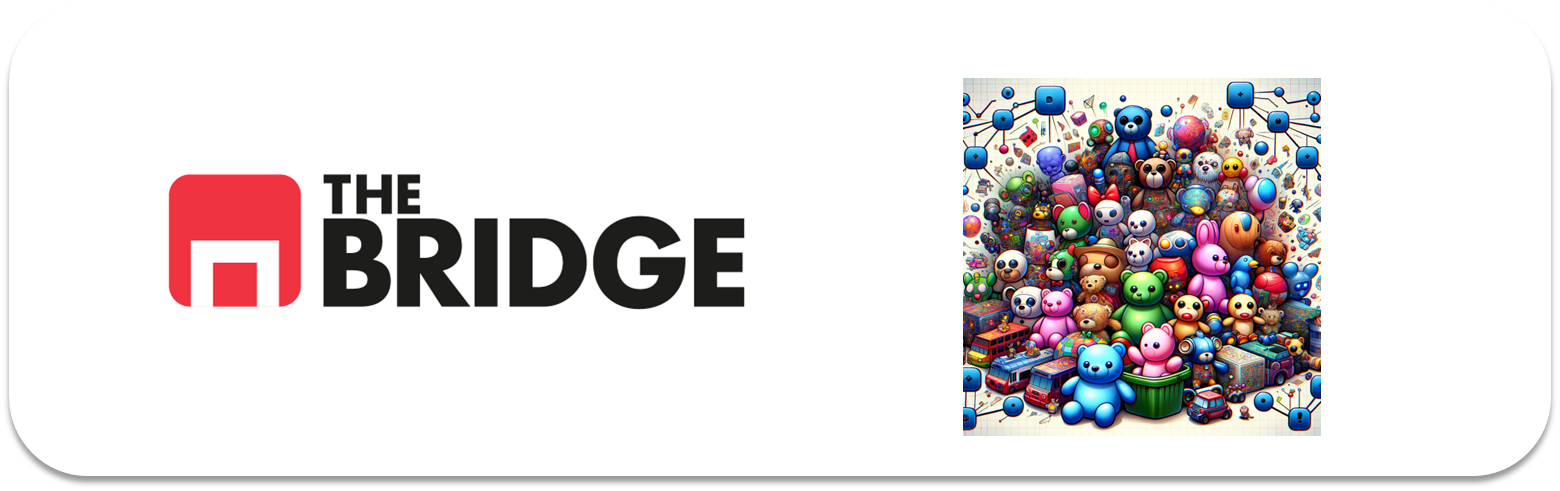

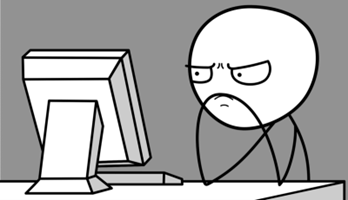

Para ejercitarte y afianzar lo aprendido sobre **DBSCAN**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Problema y "justificación": DBSCAN

Como sabemos, existen diversas técnicas de clusterización comprendidas por algoritmos de machine learning no supervisados, cuya finalidad es agrupar distintos elementos de una data sin la necesidad de estar previamente etiquetados. 

Anteriormente utilizamos el algoritmo de KMeans, sin embargo, dicho algoritmo tiene algunas limitaciones, como el hecho de que no siempre es sencillo obtener un número de K clusters óptimo o que algunas distribuciones de datos no se ajustan a la agrupación por clusters debido a la naturaleza del algoritmo. Para estos casos existen diversos algoritmos de clusterización. 

A continuación, vamos a utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para capturar grupos en data con patrones relativamente complejos.

Utilizaremos data de clientes de un distribuidor al por mayor, en el que se recogen por línea ventas a diferentes establecimientos y empresas de sus productos (aunque no se incluye el identificador de establecimiento) y cuyo objetivo es obtener agrupacioines interesantes (agrupaciones no predefinidas de productos que se suelen comprar juntos):

Features:

    1) FRESH: Gastos en productos frescos;
    2) MILK: Gastos en productos lacteos;
    3) GROCERY: Gastos en comestibles;
    4) FROZEN: Gastos en congelados;
    5) DETERGENTS_PAPER: Gastos en detergentes y derivados del papel;
    6) DELICATESSEN: Gatos en comestibles finos;
    7) CHANNEL: Canal que utilizan los clientes para vender - Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor);
    8) REGION: Región del cliente;

Fuente: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [48]:
import pandas as pd
import numpy as np

#pintar
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga los datos y haz una primera exploración, incluyendo una descripción de las variables numéricas.

In [49]:
data = pd.read_csv('./data/wholesale-customers-data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


$$***$$

Es hora de hacer un miniEda (cuyo objetivo en el caso de clusterizacion no es obtener features para predicción de un target que no tenemos), cuyo objetivo es poder intuir posibles agrupaciones y su número, detectar si hay que hacer transformaciones y escalado en las variables y cuál

### Ejercicio 2



Pinta el histograma de las variables y determina cuáles podríamos considerar numéricas continuas y cuáles numéricas discretas (o categóricas)

<Figure size 800x600 with 0 Axes>

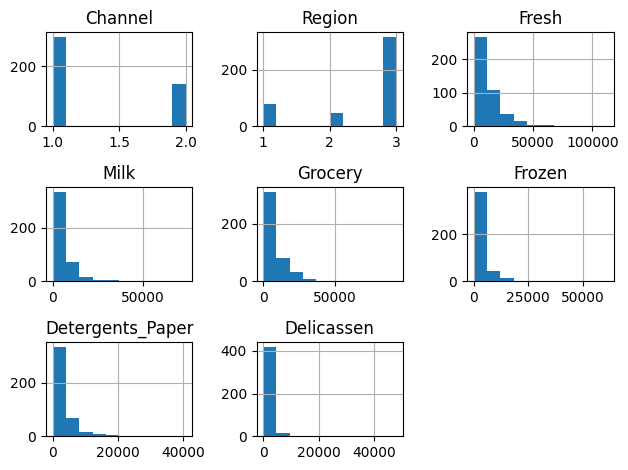

In [51]:
plt.figure(figsize=(8,6))
data.hist()
plt.tight_layout()

In [52]:
cat = ['Channel','Region']
num = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

### Ejercicio 3

Antes de decidir sobre las agrupaciones, vamos pintar los histrogramas pero separando por canal (ya que es un elemento muy diferenciador del tipo de venta que se realiza a mayorista). Muestra graficamente para cada variable numérica su histograma para cada canal (Horeca y Retail). 

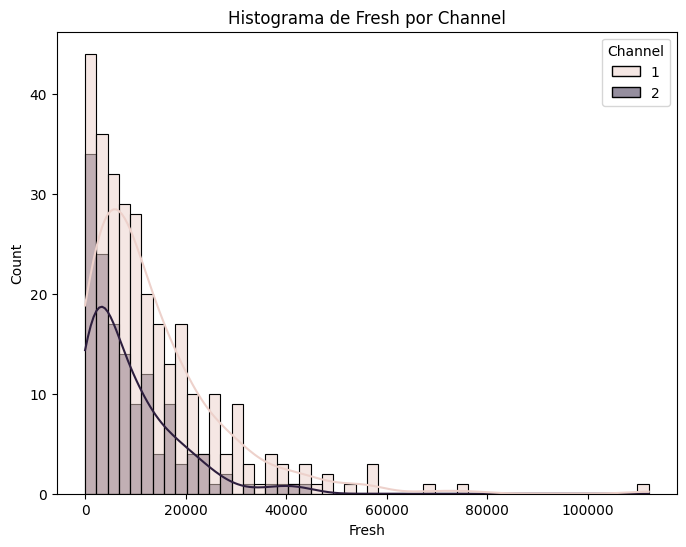

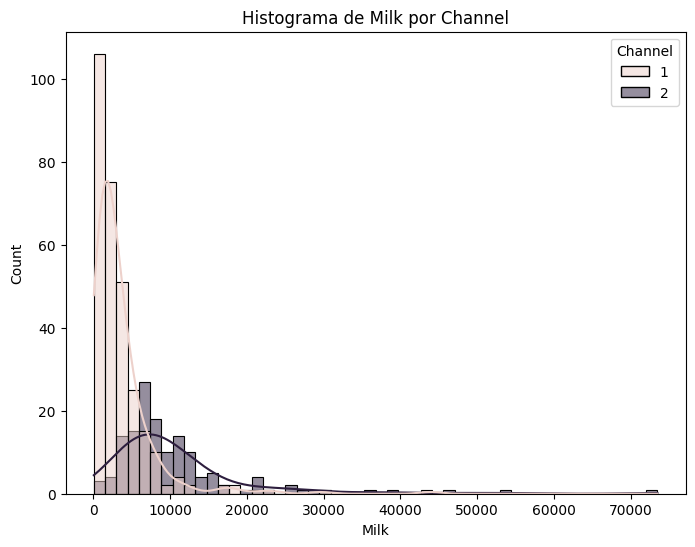

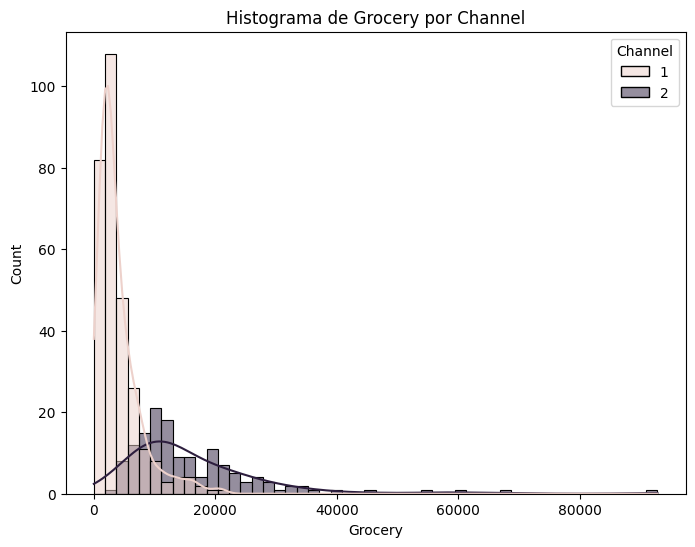

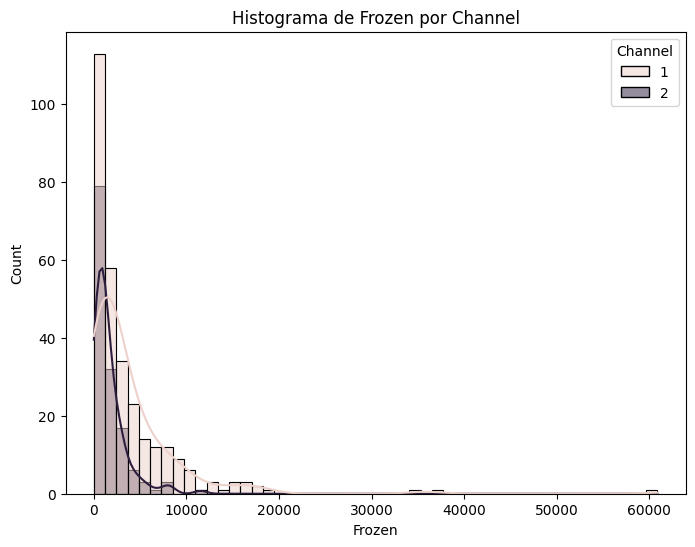

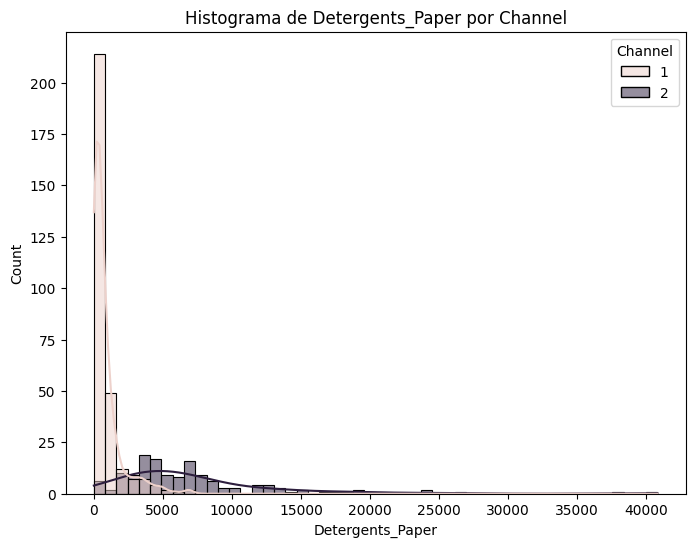

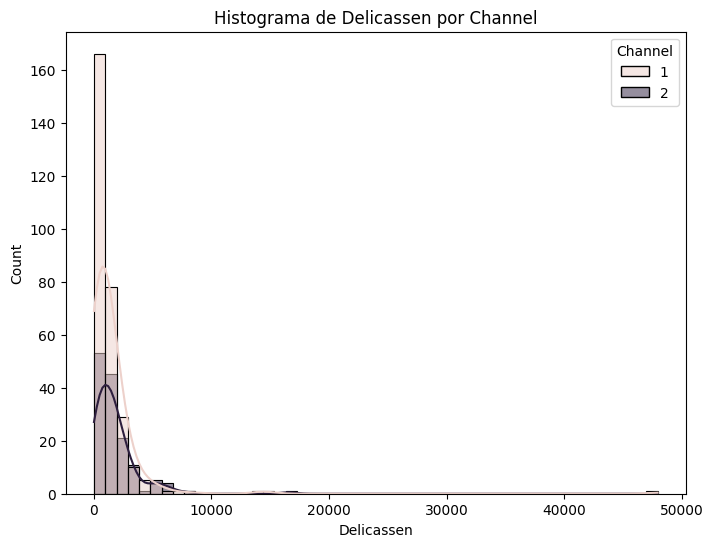

In [53]:
for var in num:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data,x=var,hue='Channel',kde=True,bins=50)
    plt.title(f'Histograma de {var} por Channel')
    plt.show()

### Ejercicio 4

Analicemos los outliers. Obten los outliers a partir de los diagramas de boxplot para todos los datos y luego separados por canal.

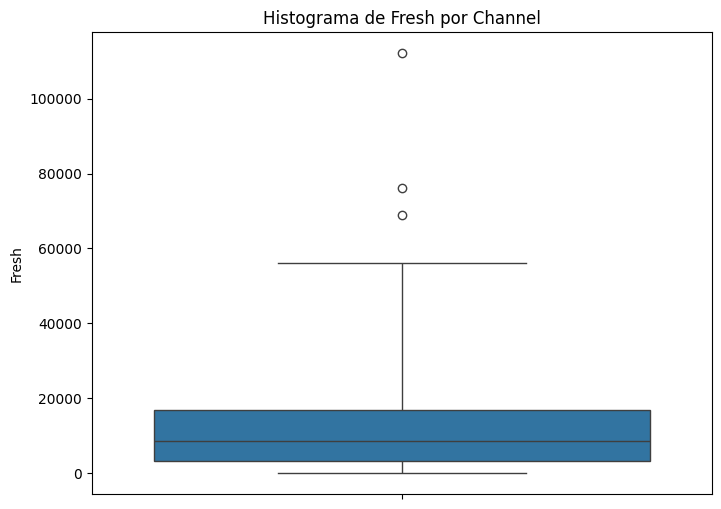

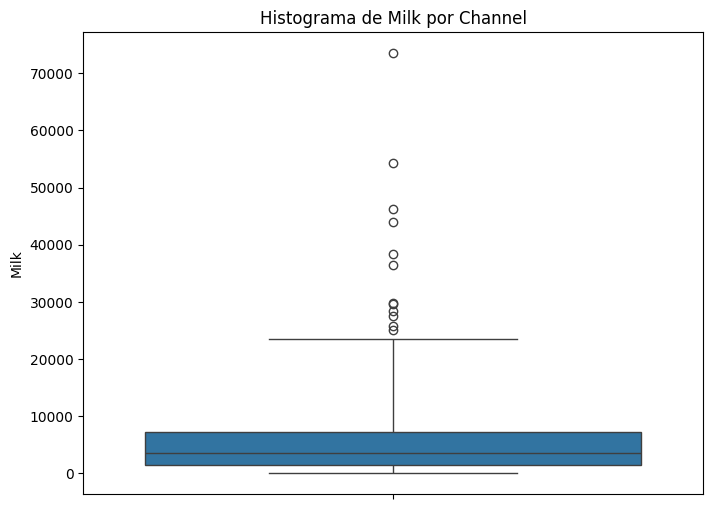

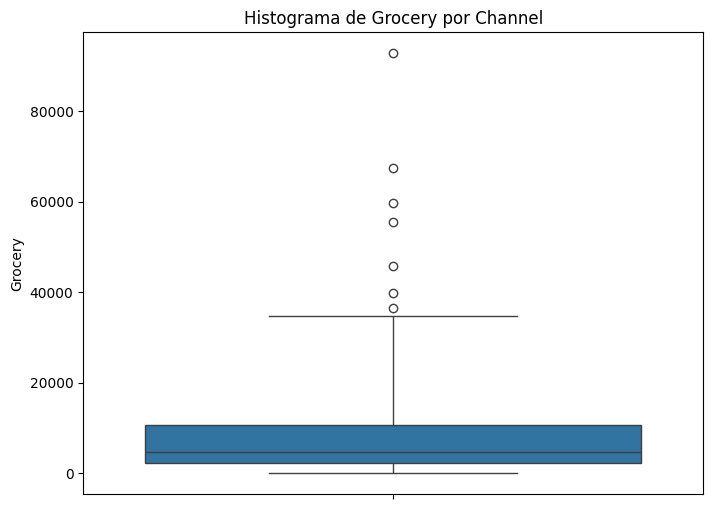

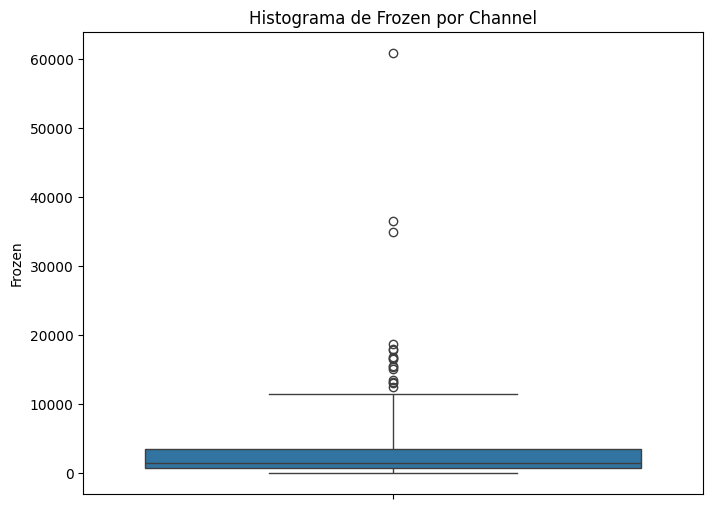

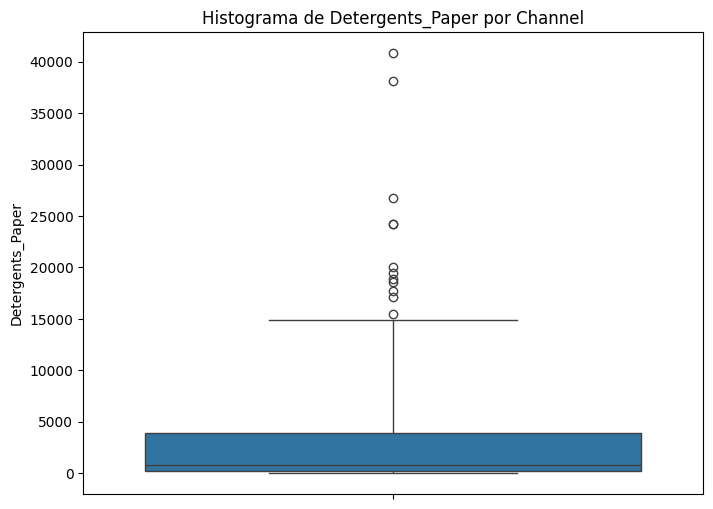

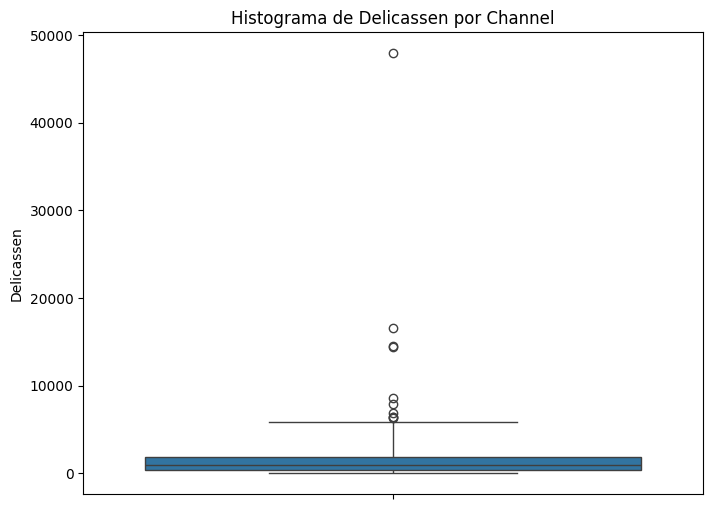

In [54]:
for var in num:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data, y= var,whis=3)
    plt.title(f'Histograma de {var} por Channel')
    plt.show()

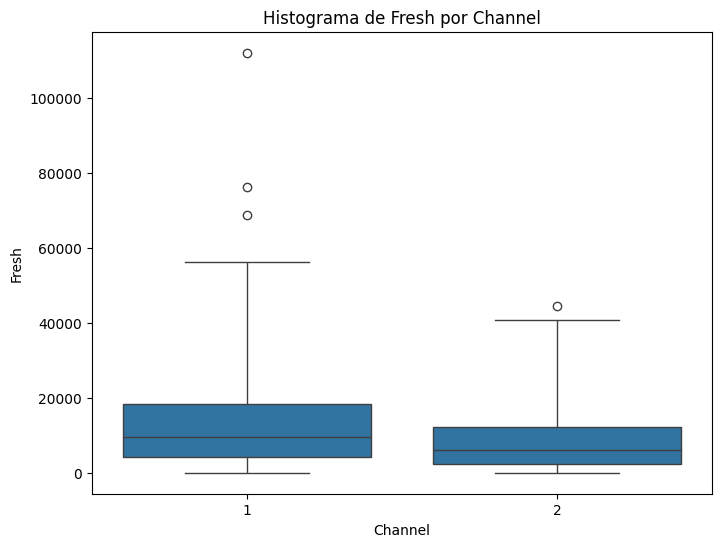

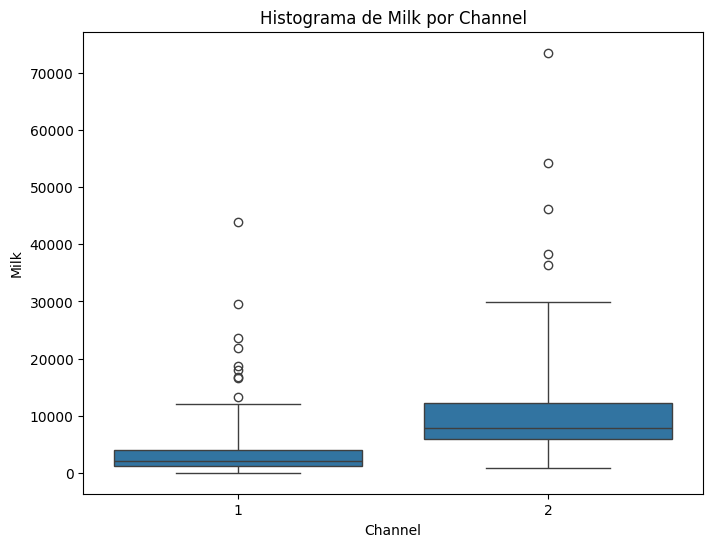

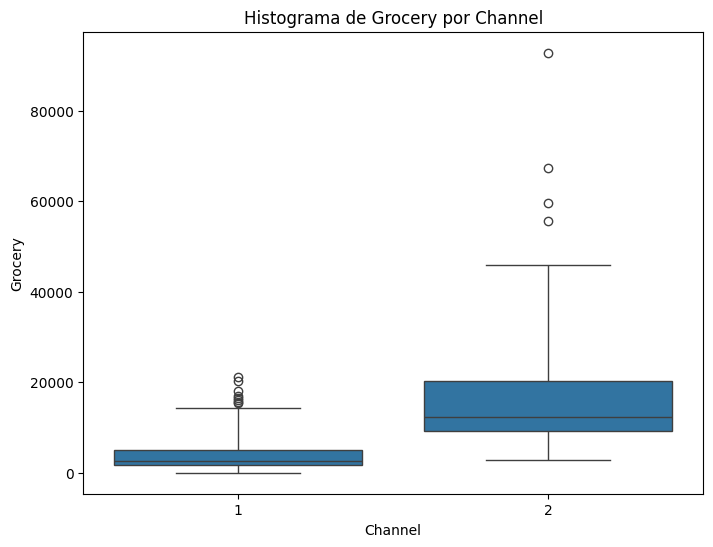

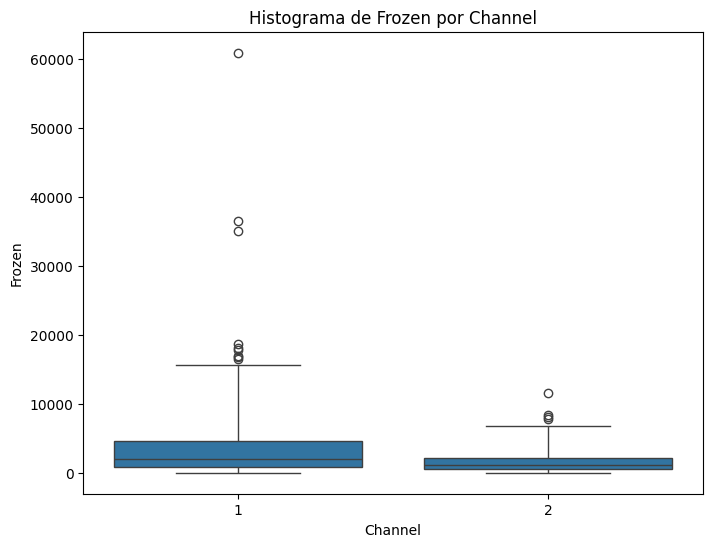

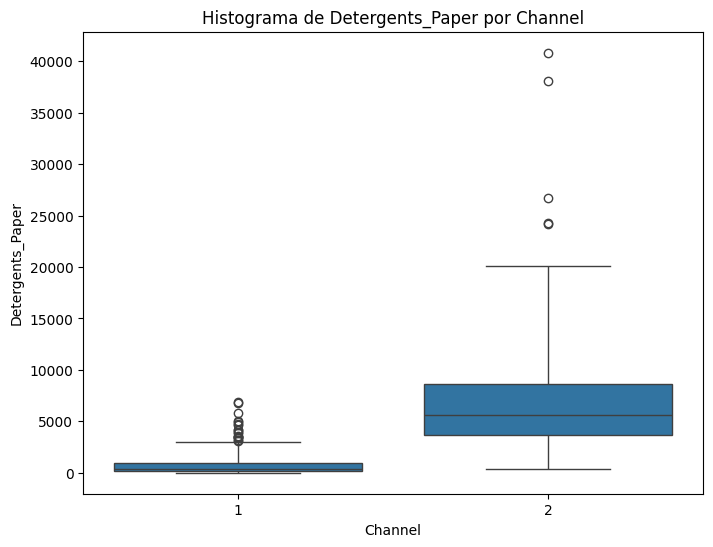

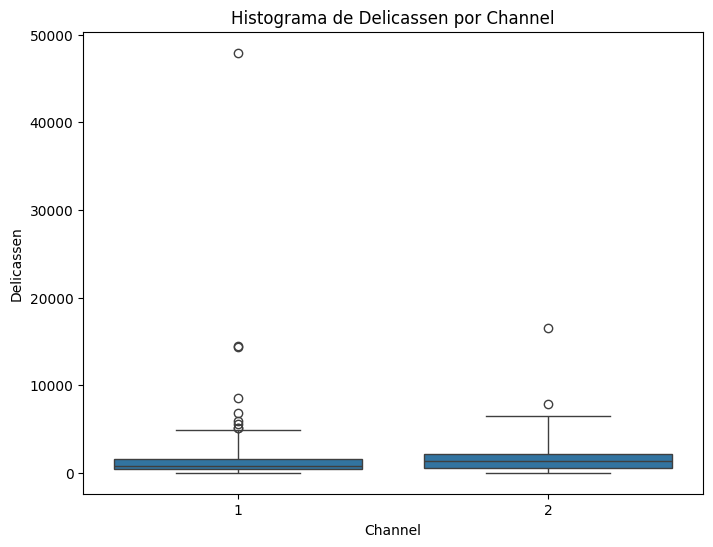

In [55]:
for var in num:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data,x='Channel', y= var,whis=3)
    plt.title(f'Histograma de {var} por Channel')
    plt.show()

### Ejercicio 5

Vamos a intentar detectar posibles agrupaciones en los datos con variables dos a dos. Utiliza un pairplot de sns para mostrar los scatter plots de las variables numéricas dos a dos e intentar visualizar algún clustering e incluso justificar usar kMeans o DBSCAN. En este ejercicio hazlo para todo el dataset.

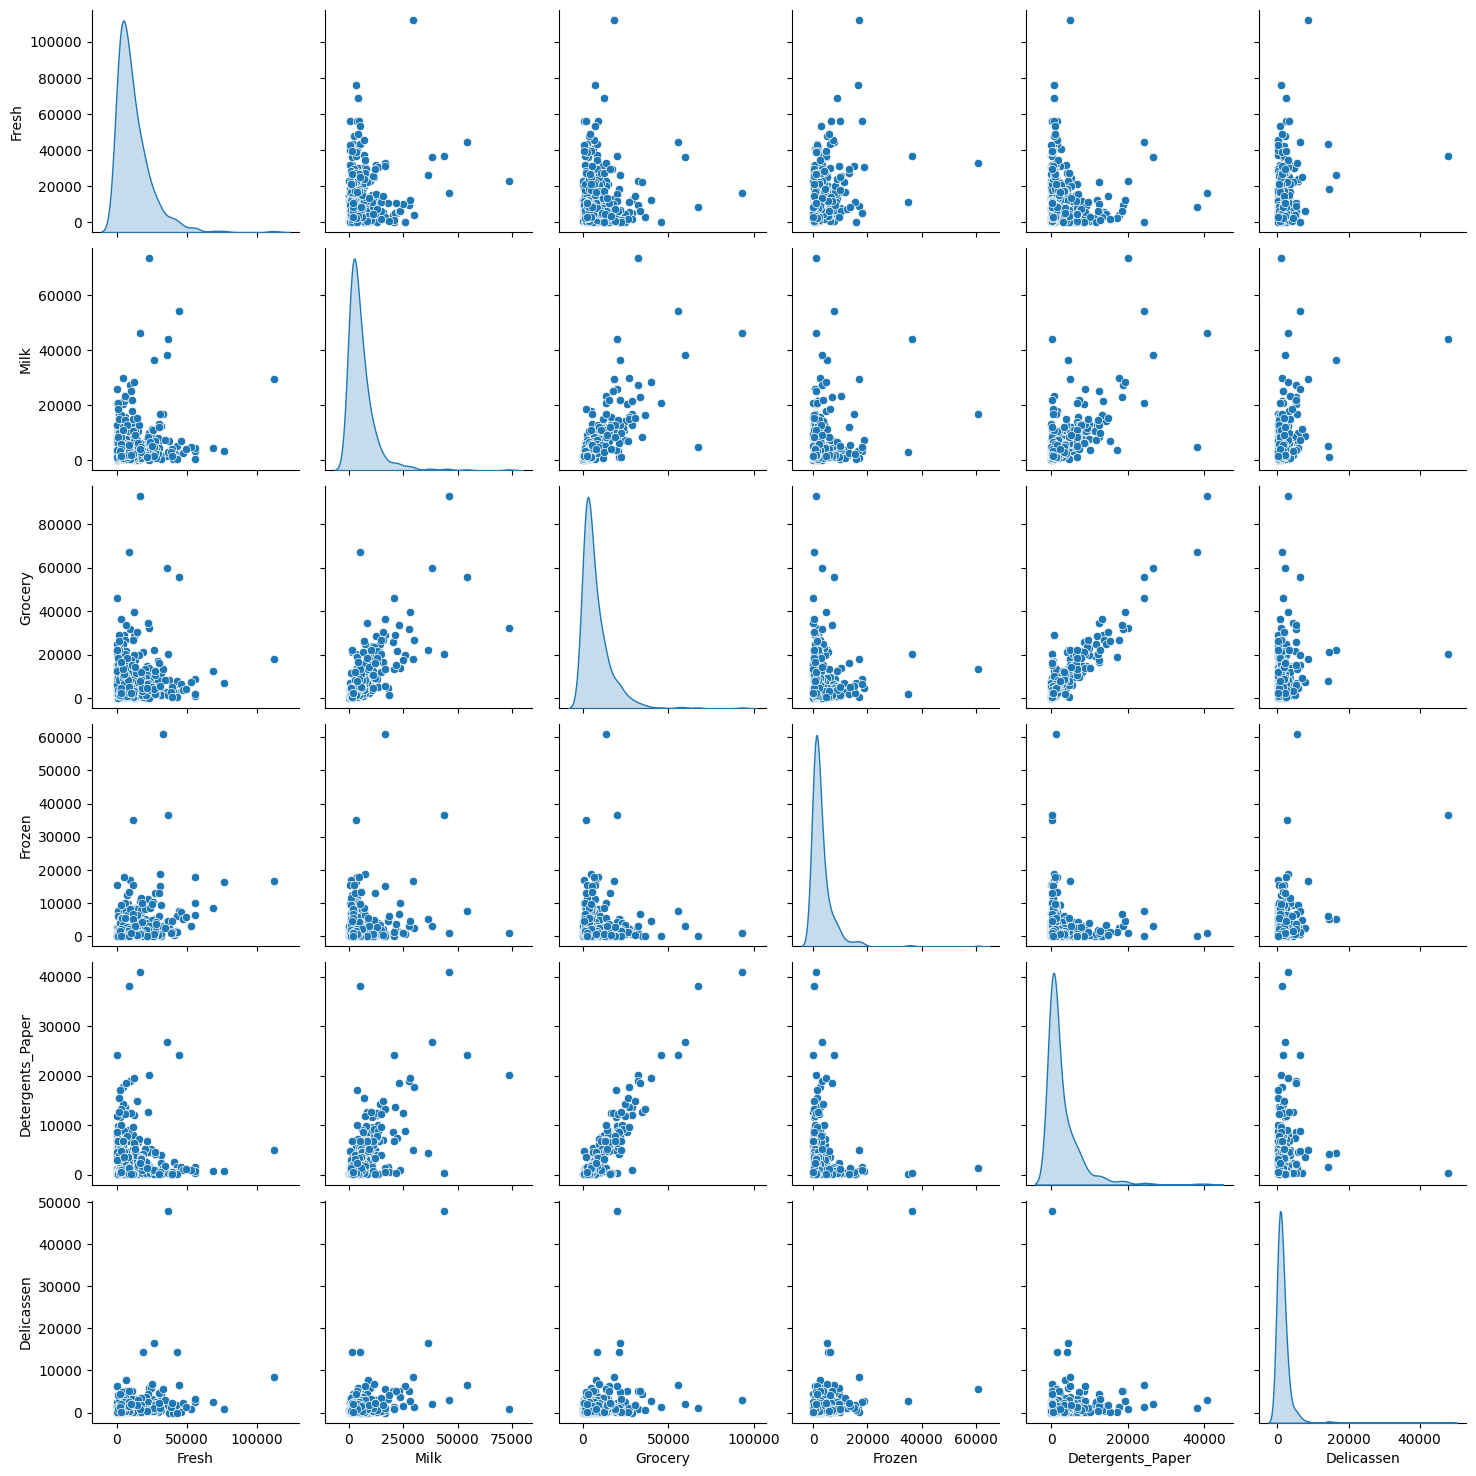

In [56]:
data_for_pairplot = data[num + ['Channel']]
sns.pairplot(data=data[num], kind='scatter', diag_kind='kde', height=2.5)
plt.show()

### Ejercicio 6

Repite el ejercicio 5 pero separando por canal. Emplea el argumento hue del pairplot para no tener que hacer dos pairplots diferentes. 

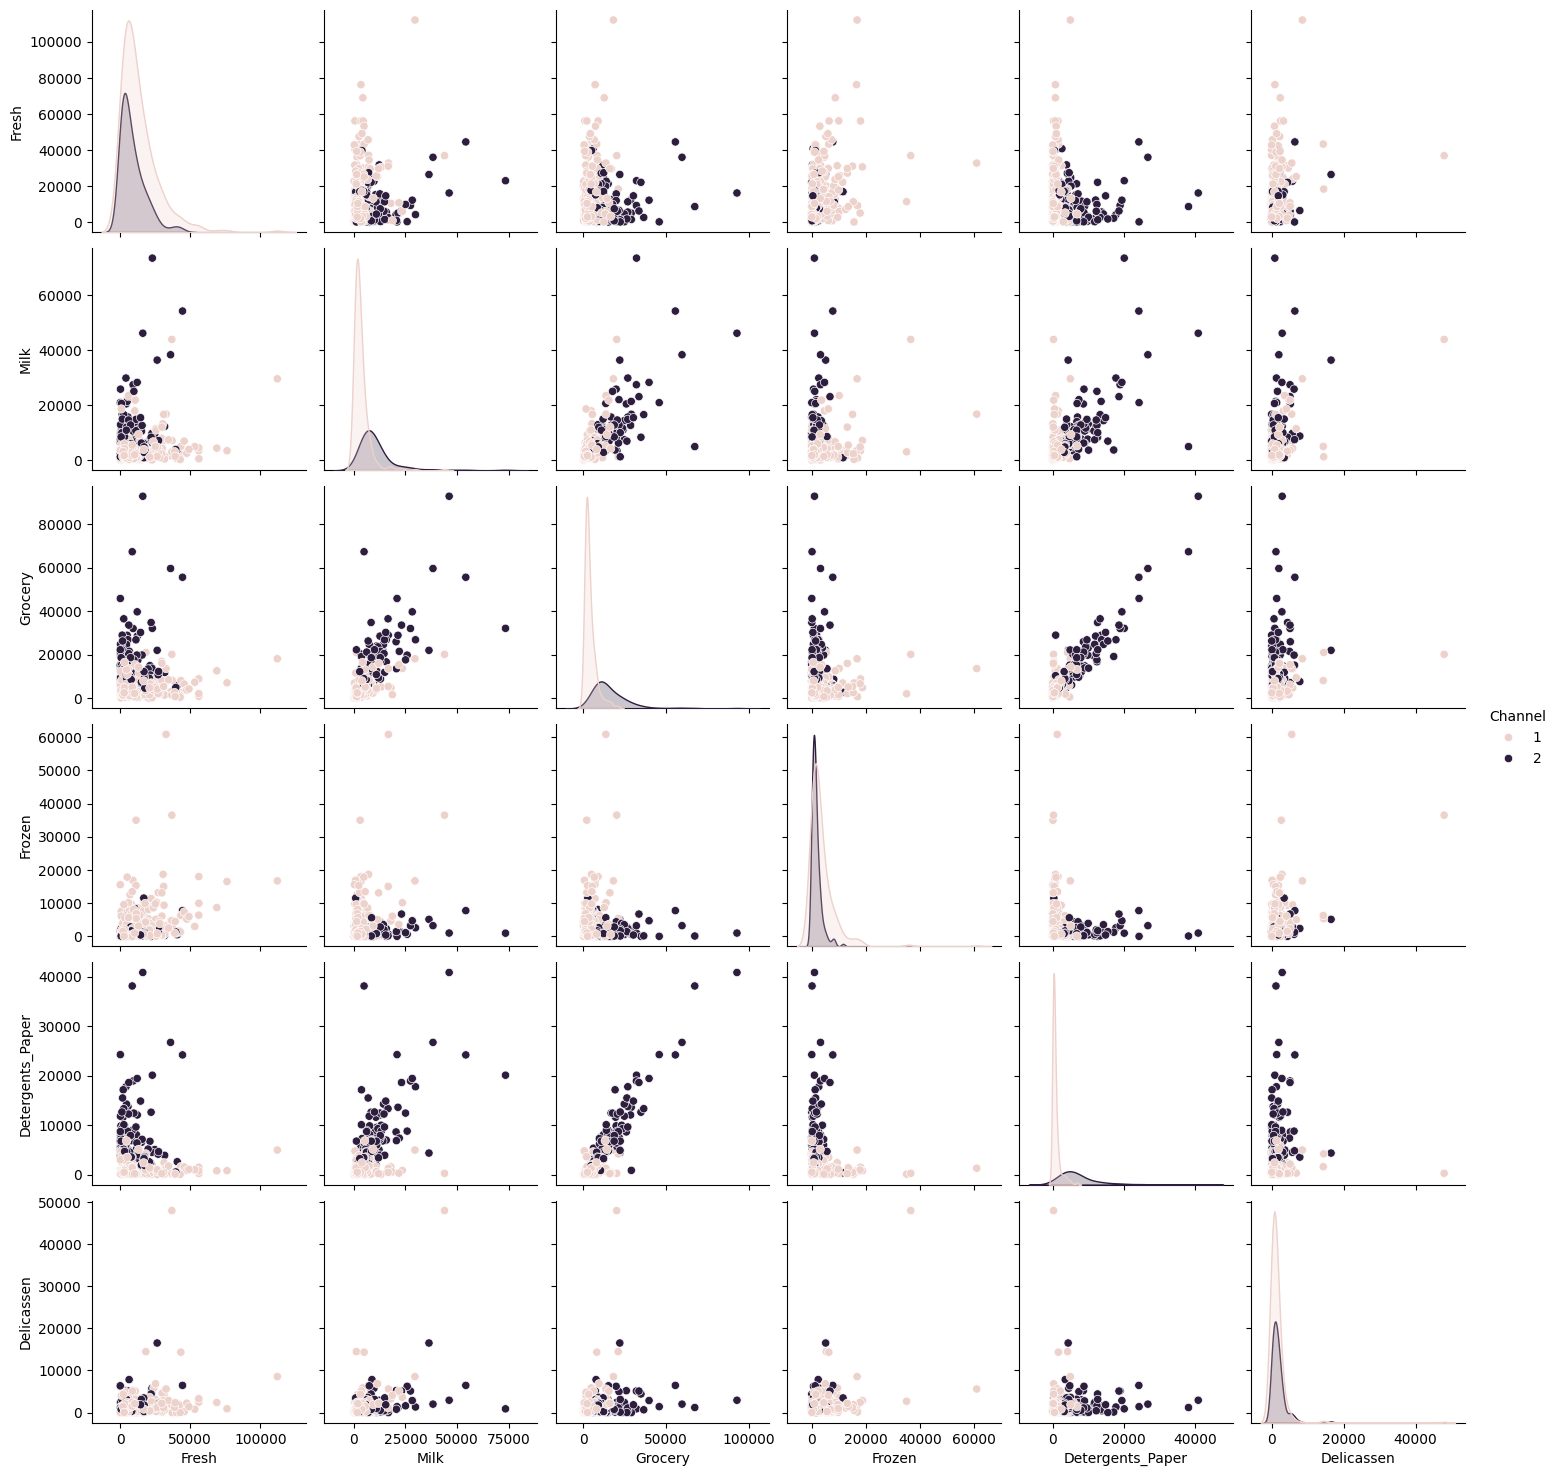

In [57]:
sns.pairplot(data=data_for_pairplot, hue='Channel', kind='scatter', diag_kind='kde', height=2.5)
plt.show()

### Ejercicio 7

Si has logrado hacer los dos ejercicios anteriores (y si no consulta su solución) tendrás una idea un poco más clara de por qué es interesante la clusterización con DBSCAN mejor que con KMeans. Así que vamos a utilizarlo, pero antes escalemos los datos, transformándolos primero (de primeras no vamos a distinguir entre canales, hazlo con todo el dataseet). Es decir aplica la tranformación que creas necesaria en las columnas numéricas que creas conveniente. Hazlo en un dataframe copiado del original para poder interpretar los valores correctamente al final.

In [58]:
#transformación logarítmica
data_transformed = data.copy()

data_transformed[num] = data_transformed[num].apply(np.log10)

data_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.000000,1.000000,1.000000,2.000000,2.000000
Region,440.0,2.543182,0.774272,1.000000,2.000000,3.000000,3.000000,3.000000
Fresh,440.0,3.791627,0.642787,0.477121,3.495227,3.929621,4.228753,5.049803
Milk,440.0,3.526926,0.469631,1.740363,3.185542,3.559547,3.856743,4.866276
Grocery,440.0,3.665953,0.484747,0.477121,3.333043,3.677196,4.027583,4.967454
Frozen,440.0,3.170956,0.557869,1.397940,2.870547,3.183547,3.550747,4.784396
Detergents_Paper,440.0,2.947110,0.747430,0.477121,2.409510,2.911952,3.593500,4.610947
Delicassen,440.0,2.894631,0.569287,0.477121,2.610924,2.984752,3.260131,4.680725


### Ejercicio 8

Escala las columnas que creas necesario. Si no lo tienes claro, escala todas.

In [59]:
# escalado
from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data_transformed),columns=data_transformed.columns)

data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.614870e-17,1.001138,-0.690297,-0.690297,-0.690297,1.448652,1.448652
Region,440.0,3.552714e-16,1.001138,-1.995342,-0.702337,0.590668,0.590668,0.590668
Fresh,440.0,4.481264e-16,1.001138,-5.162332,-0.461641,0.214925,0.680822,1.959605
Milk,440.0,1.937844e-16,1.001138,-3.808515,-0.727747,0.069540,0.703090,2.855165
Grocery,440.0,7.589888e-16,1.001138,-6.585828,-0.687551,0.023220,0.746868,2.687964
Frozen,440.0,3.714201e-16,1.001138,-3.181814,-0.539108,0.022596,0.681564,2.895443
Detergents_Paper,440.0,7.347658e-16,1.001138,-3.308406,-0.720084,-0.047092,0.865802,2.228613
Delicassen,440.0,6.378736e-16,1.001138,-4.251391,-0.498921,0.158486,0.642762,3.140996


### Ejercicio 9

En el caso de los modelos no supervisados, una vez hemos tratado las features hay que escoger los hiperparámetros. En el caso de dBSCAN no es el número de clústeres, sino la distancia `eps` que determina el vecindario de un punto y el número de vecinos a partir del cual se decide si una instancia es core o no (`min_samples`). 

Una forma de hacerlo es iterar sobre rangos de estos dos hiperparámetros midiendo el porcentaje de "anomalías" que detecta y considerando como punto de parada un valor por debajo del 10%.

NOTA: Usa el doble de cantidad de tus features para el mínimo de elementos y un rango para el epsilon de 0.001 a 3. Para min_samples vamos a usar un valor "estimado" que corresponde a 2 veces el número de features empleadas.

In [60]:
from sklearn.cluster import DBSCAN # Siempre, por ahora, tirando de sklearn

# Inicializar el umbral de anomalías
anomalies_threshold = 0.1  # Umbral del 10% para las anomalías

# Rango para el epsilon
epsilon_range = np.arange(0.001, 3, 0.05)

# Calcular el valor estimado de min_samples, que es 2 veces el número de features
min_samples_estimated = 2 * len(data_transformed.columns)

# Variable para detener el bucle cuando se alcance el umbral de anomalías
best_eps = None
best_min_samples = None
best_anomalies = float('inf')

# Bucle para iterar sobre diferentes valores de eps y min_samples
for eps in epsilon_range:
    for min_samples in range(min_samples_estimated, min_samples_estimated + 1):  # Solo un valor de min_samples estimado
        # Crear y entrenar el modelo DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data_scaled)

        # Identificar los puntos de anomalía (etiquetas -1 indican anomalías)
        anomalies = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

        # Si el porcentaje de anomalías es menor que el umbral, guardamos este modelo
        if anomalies < anomalies_threshold:
            best_eps = eps
            best_min_samples = min_samples
            best_anomalies = anomalies
            break
    if best_eps is not None:  # Si se ha encontrado un buen modelo, salimos del bucle
        break

# Mostrar los mejores parámetros encontrados
print(f"Mejor valor de eps: {best_eps}")
print(f"Mejor valor de min_samples: {best_min_samples}")
print(f"Porcentaje de anomalías: {best_anomalies * 100}%")

Mejor valor de eps: 1.951
Mejor valor de min_samples: 16
Porcentaje de anomalías: 9.318181818181818%


### Ejercicio 10

Entrena un clustering DBSCAN con el valor que hayas encontrado como mejor en el ejercicio anterior (si no has visto claramente un valor, usa eps = 2) y `min_samples` a dos veces el número de features empleadas.

In [61]:
# Crear y entrenar el modelo DBSCAN
dbscan_best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_best_model.fit(data_scaled)

DBSCAN(eps=1.951, min_samples=16)

### Ejercicio 11

Agrega las etiquetas generadas con DBSCAN a tu dataframe original e interpreta los resultados (observa el número de etiquetas, recuerda que -1 no es un cluster son anomalías o outliers) luego contesta a: ¿Qué grupos o patrones fué capaz de capturar el DBSCAN? (Haz las tablas de contingencia de las etiquetas con las dos variables categóricas, por separado, por ejemplo y a partir de ahí justifica tu respuesta)

In [62]:
# Ver las etiquetas asignadas por el modelo
labels = dbscan_best_model.labels_

# Agregar las etiquetas al DataFrame original
data['DBSCAN_labels'] = labels

# Ver los primeros registros con las etiquetas
data.DBSCAN_labels.value_counts()

DBSCAN_labels
 1    269
 0    130
-1     41
Name: count, dtype: int64

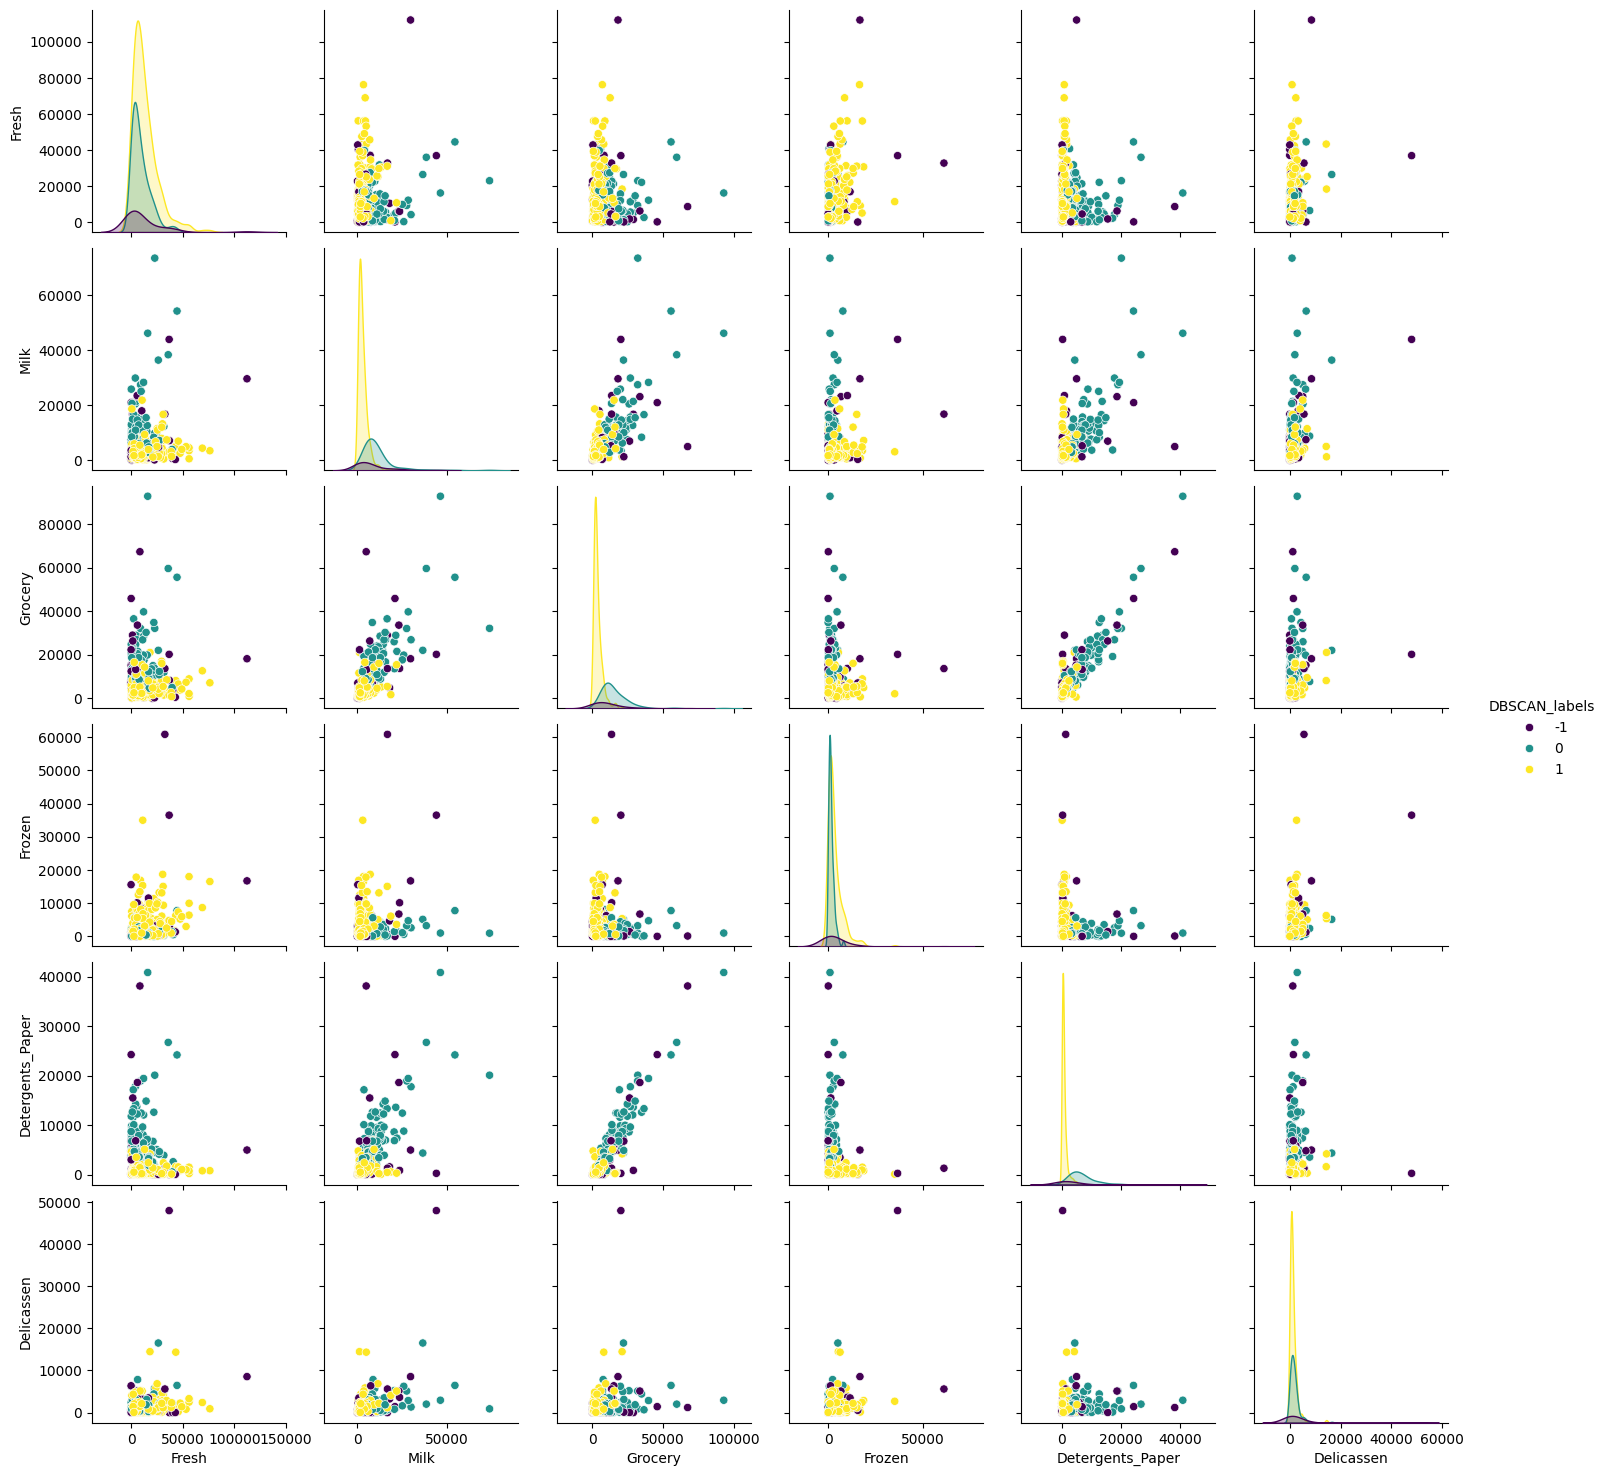

In [63]:
# Asignar las etiquetas de DBSCAN al DataFrame original
data['DBSCAN_labels'] = dbscan_best_model.labels_

# Seleccionar solo las columnas numéricas para el pairplot
data_for_pairplot = data[num + ['DBSCAN_labels']]

# Crear un pairplot, usando las etiquetas de DBSCAN como hue para separar los clusters
sns.pairplot(data_for_pairplot, hue='DBSCAN_labels', palette='viridis', diag_kind='kde', height=2.5)

# Mostrar el gráfico
plt.show()

In [64]:
# Crear tabla de contingencia para 'Channel'
contingency_channel = pd.crosstab(data['Channel'], data['DBSCAN_labels'], margins=True, margins_name="Total")
print("Tabla de Contingencia entre 'Channel' y 'DBSCAN_labels'")
print(contingency_channel)

# Crear tabla de contingencia para 'Region'
contingency_region = pd.crosstab(data['Region'], data['DBSCAN_labels'], margins=True, margins_name="Total")
print("\nTabla de Contingencia entre 'Region' y 'DBSCAN_labels'")
print(contingency_region)


Tabla de Contingencia entre 'Channel' y 'DBSCAN_labels'
DBSCAN_labels  -1    0    1  Total
Channel                           
1              29    0  269    298
2              12  130    0    142
Total          41  130  269    440

Tabla de Contingencia entre 'Region' y 'DBSCAN_labels'
DBSCAN_labels  -1    0    1  Total
Region                            
1              13   13   51     77
2               4   17   26     47
3              24  100  192    316
Total          41  130  269    440


+ Precisión en Channel: DBSCAN logra una separación clara entre las categorías Channel 0 y Channel 1. Los puntos de cada categoría están claramente agrupados, con pocos puntos de Channel 1 considerados como anomalías. Esto indica que el modelo ha identificado bien los grupos de datos en función del canal, lo que sugiere que las características del espacio de datos para Channel son más homogéneas.

+ Imprecisión en Region: Para Region, los datos de las tres regiones están mezclados en los clusters, lo que indica que el modelo no logra una separación clara entre las diferentes regiones. Las regiones no parecen tener una distinción tan marcada en el espacio de características y, por lo tanto, el modelo los agrupa sin una separación estricta.